# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
cities = pd.DataFrame(cities)
# Print the city count to confirm sufficient count
len(cities)
temp= []
humidity = []
cloud = []
wind = []
name=[]
country=[]
date =[]
lat=[]
lon=[]
# cities
index = 0
set_number = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?"
print('Beginning Data Retrieval')
print('---------------------------------')
for city in cities[0]:
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"
    weather_json = requests.get(query_url).json()
    try:
        print(f'Processing Record {index +1} of Set {set_number} | {weather_json["name"]}')
    except KeyError:
        print('City not found. Skipping...')
    try:
        temp.append(weather_json['main']['temp_max'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        humidity.append(weather_json['main']['humidity'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        cloud.append(weather_json['clouds']['all'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        wind.append(weather_json['wind']['speed'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        name.append(weather_json['name'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        country.append(weather_json['sys']['country'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        date.append(weather_json['dt'])
    except KeyError:
        pass
        print('City not found. Skipping...')    
    try:
        lat.append(weather_json['coord']['lat'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    try:
        lon.append(weather_json['coord']['lon'])
    except KeyError:
        pass
        print('City not found. Skipping...')
    index=index+1
    if index == 50:
        index = 0
        set_number=set_number+1

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | Port Alfred
Processing Record 2 of Set 1 | Iqaluit
Processing Record 3 of Set 1 | Gamba
Processing Record 4 of Set 1 | Pregradnaya
Processing Record 5 of Set 1 | Busselton
Processing Record 6 of Set 1 | Maxixe
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | Te Anau
Processing Record 9 of Set 1 | Allapalli
Processing Record 10 of Set 1 | Bredasdorp
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Rikitea
Processing Record 13 of Set 1 | Coihaique
Processing Record 14 of Set 1 | Cidreira
Processing Record 15 of Set 1 | Berlevag
Processing Record 16 of Set 1 | Mataura
Processing Record 17 of Set 1 | West Wendover
Process

Processing Record 25 of Set 3 | Olavarria
Processing Record 26 of Set 3 | Bealanana
Processing Record 27 of Set 3 | Cap Malheureux
Processing Record 28 of Set 3 | Ust-Maya
Processing Record 29 of Set 3 | Xichang
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 3 | Union Hidalgo
Processing Record 32 of Set 3 | Fare
Processing Record 33 of Set 3 | Mwense
Processing Record 34 of Set 3 | Paamiut
Processing Record 35 of Set 3 | Salamanca
Processing Record 36 of Set 3 | Aykhal
Processing Record 37 of Set 3 | Tsaratanana
Processing Record 38 of Set 3 | Henties Bay
Processing Record 39 of Set 3 | Lubon
Processing Record 40 of Set 3 | Chokurdakh
Processing Record 41 of Set 3 | Snasa
Processing Record 42 of Set 3 | Kruisfontein
Processing Re

Processing Record 46 of Set 5 | Souillac
Processing Record 47 of Set 5 | Portland
Processing Record 48 of Set 5 | Hambantota
Processing Record 49 of Set 5 | La Orilla
Processing Record 50 of Set 5 | Ust-Uda
Processing Record 1 of Set 6 | Capitanejo
Processing Record 2 of Set 6 | Kaspiyskiy
Processing Record 3 of Set 6 | San Cristobal
Processing Record 4 of Set 6 | Rio Gallegos
Processing Record 5 of Set 6 | Bulanash
Processing Record 6 of Set 6 | Ancud
Processing Record 7 of Set 6 | Skjervoy
Processing Record 8 of Set 6 | Esperance
Processing Record 9 of Set 6 | Khovu-Aksy
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...


Processing Record 50 of Set 7 | Fairlie
Processing Record 1 of Set 8 | Lao Cai
Processing Record 2 of Set 8 | Klyuchi
Processing Record 3 of Set 8 | Tuzha
Processing Record 4 of Set 8 | Clyde River
Processing Record 5 of Set 8 | Nichinan
Processing Record 6 of Set 8 | Suez
Processing Record 7 of Set 8 | Vao
Processing Record 8 of Set 8 | Peniche
Processing Record 9 of Set 8 | Palmer
Processing Record 10 of Set 8 | Jalu
Processing Record 11 of Set 8 | Tuatapere
Processing Record 12 of Set 8 | Khani
Processing Record 13 of Set 8 | Zhangye
Processing Record 14 of Set 8 | San Patricio
Processing Record 15 of Set 8 | Broken Hill
Processing Record 16 of Set 8 | Paka
Processing Record 17 of Set 8 | Shimoda
Processing Record 18 of Set 8 | Polson
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...


Processing Record 19 of Set 10 | Mackay
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 21 of Set 10 | Tomball
Processing Record 22 of Set 10 | Shahrud
Processing Record 23 of Set 10 | Isilkul
Processing Record 24 of Set 10 | Coos Bay
Processing Record 25 of Set 10 | Jacareacanga
Processing Record 26 of Set 10 | Port-Gentil
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 10 | Thompson
Processing Record 29 of Set 10 | Salinas
City not found. Skipping...
City not found. Skipping...
City 

Processing Record 2 of Set 13 | Otradnoye
Processing Record 3 of Set 13 | Gornoye Loo
Processing Record 4 of Set 13 | Ibra
Processing Record 5 of Set 13 | Ust-Nera
Processing Record 6 of Set 13 | Umm Lajj
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 13 | Billings
Processing Record 9 of Set 13 | Santo Antonio do Leverger


In [41]:
data = zip(country, date, cloud, humidity, lat, lon, temp, wind)
data= pd.DataFrame(data, columns=['Country', 'Date', 'Cloudiness', 'Humidity', 'Latitude', 'Longitude', 'Max Temp (F)', 'Wind Speed (mph)'])
data.to_csv('data_used_For_graphs.csv')
data.head()

,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,ZA,1561582253,98,90,-33.59,26.89,60.01,1.99
1,CA,1561582253,20,70,63.75,-68.52,44.60,8.05
2,CN,1561582253,59,76,28.28,88.52,41.27,0.49
3,RU,1561582254,0,94,43.95,41.19,58.91,4.41
4,AU,1561582254,3,52,-33.64,115.35,54.00,32.66


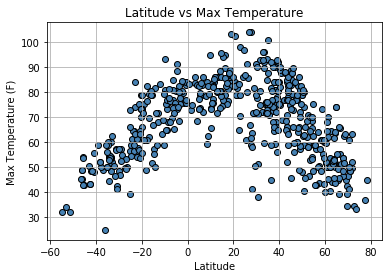

In [42]:
lat_vs_temp =plt.scatter(data['Latitude'], data['Max Temp (F)'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat_vs_Temp.png')

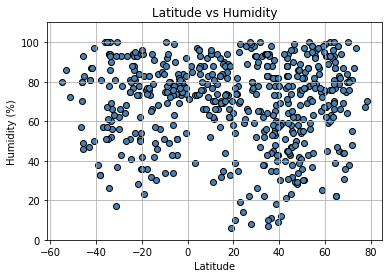

In [43]:
humidity_vs_latitude=plt.scatter(data['Latitude'], data['Humidity'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.ylim(0, 110)
plt.savefig('Lat_vs_Humidity.png')

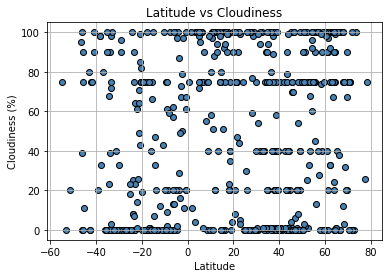

In [44]:
cloudiness_vs_latitude=plt.scatter(data['Latitude'], data['Cloudiness'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Lat_vs_Cloudiness.png')

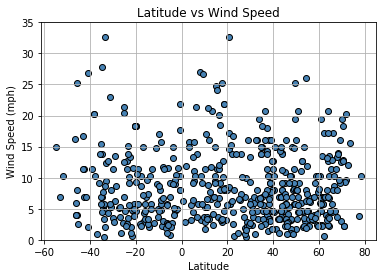

In [45]:
windspeed_vs_latitude=plt.scatter(data['Latitude'], data['Wind Speed (mph)'], marker='o', facecolors='steelblue', edgecolors='black')
plt.title(f'Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.ylim(0,35)
plt.savefig('Lat_vs_WindSpeed.png')

# Observable Trends

1. In the first Latitude vs Max Temperature scatter plot we see that the closer the city is to the equator, the higher the max temperature.

2. In the Latitude vs Wind Speed scatter plot we see that the windspeed is not influenced by latitude.

3. When the humidity percentage is less that 20%, the city latitude generally falls between -40 and -20, or 20 and 40.

4. The x-axis range is from -60 to 80 (latitude). Latitudes beyond this range may lie in uninhabitable environments. 